In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
# execfile('setting.py')

In [2]:
# %matplotlib inline
# import matplotlib.font_manager as fm
# path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
# fontprop = fm.FontProperties(fname=path, size=18).get_name()
# matplotlib.rc('font', family=fontprop)

from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False

path1 = '/Users/bagdaemin/Desktop/eoals/Computer/python/posco/learning/221026_Big Data 분석_실습화일/1 Big Data 분석 기초/'
path2 = '/Users/bagdaemin/Desktop/eoals/Computer/python/posco/learning/221026_Big Data 분석_실습화일/2. Big Data 분석/'

In [3]:
df_raw = pd.read_csv(path2+'Concrete.csv')
df_raw.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age  strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

{'whiskers': [<matplotlib.lines.Line2D at 0x7f90316a68b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f90316a6e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f90316a65e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9040cac430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9040cac700>,
 'means': []}

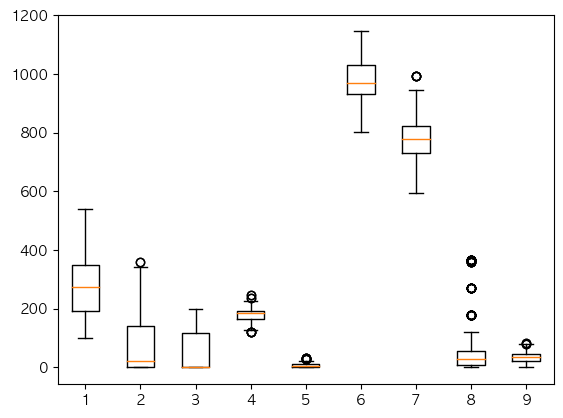

In [4]:
plt.boxplot(df_raw)

# 중복값 제거 및 종속변수, 독립변수 분리

In [5]:
df_raw_y = df_raw['strength']
df_raw_x = df_raw.drop('strength', axis = 1)
index = df_raw_x[df_raw_x.duplicated()].sort_values(['cement']).index
df_raw_x = df_raw_x.drop(index, axis = 0)
df_raw_y = df_raw_y.drop(index, axis = 0)

## Train Data를 7 Test Data를 3의 비율로 나눔

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (595, 8)
train data Y size : (595,)
test data X size : (397, 8)
test data Y size : (397,)


# 의사결정나무 모델 생성 및 설명력 확인

In [7]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on trainging set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on trainging set : 1.000
Score on test set : 0.802


## 파라미터 조정
## min_samples_leaf 

In [8]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

## 모델 설명력 확인 및 그래프 확인

In [9]:
df_score_leaf.round(3)

MinSamplesLeaf  TrainScore  TestScore
0                1       1.000      0.802
1                2       0.984      0.817
2                3       0.967      0.806
3                4       0.943      0.769
4                5       0.927      0.768
5                6       0.917      0.765
6                7       0.903      0.755
7                8       0.888      0.764
8                9       0.875      0.758
9               10       0.861      0.743
10              11       0.851      0.735
11              12       0.841      0.723
12              13       0.823      0.722
13              14       0.815      0.717
14              15       0.804      0.688
15              16       0.798      0.684
16              17       0.787      0.681
17              18       0.782      0.677
18              19       0.774      0.673

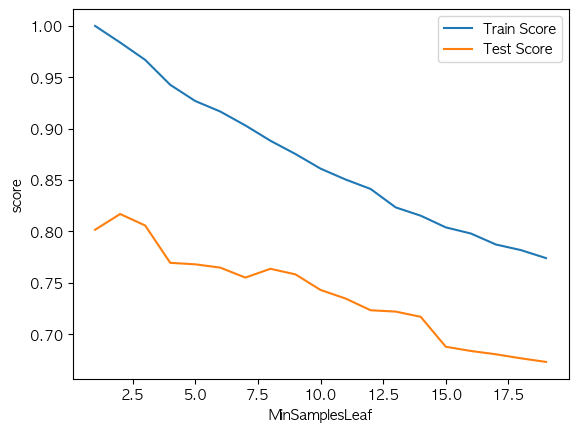

In [10]:
plt.plot(para_leaf, train_score, linestyle="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('MinSamplesLeaf')
plt.legend()

## leaf 2 선택

## 파라미터 조정
## min_samples_split

In [11]:
train_score = []
test_score = []

para_split = [n_split * 1 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 2, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [12]:
df_score_split.round(3)

MinSamplesSplit  TrainScore  TestScore
0                 2       0.984      0.817
1                 3       0.984      0.817
2                 4       0.984      0.817
3                 5       0.980      0.816
4                 6       0.975      0.785
5                 7       0.969      0.804
6                 8       0.961      0.797
7                 9       0.957      0.778
8                10       0.951      0.789
9                11       0.947      0.769
10               12       0.941      0.759
11               13       0.930      0.766
12               14       0.928      0.768
13               15       0.922      0.748
14               16       0.919      0.766
15               17       0.919      0.764
16               18       0.915      0.764
17               19       0.912      0.757

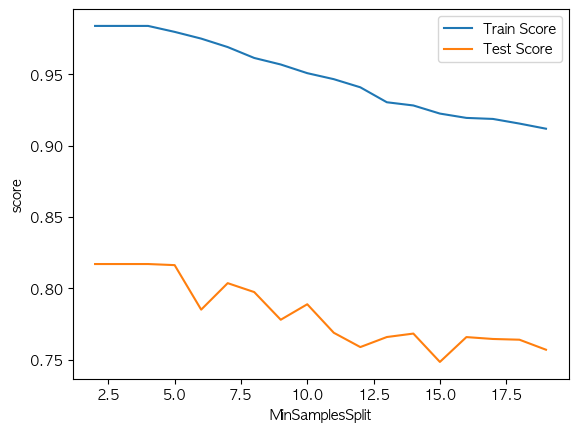

In [13]:
plt.plot(para_split, train_score, linestyle="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('MinSamplesSplit')
plt.legend()

## min_samples_split 2선택

## 파라미터 조정
## max_depth

In [14]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 20)]
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 2, min_samples_split = 2,max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [15]:
df_score_depth.round(3)

Depth  TrainScore  TestScore
0       1       0.263      0.244
1       2       0.469      0.373
2       3       0.631      0.547
3       4       0.732      0.651
4       5       0.811      0.714
5       6       0.893      0.759
6       7       0.935      0.778
7       8       0.957      0.796
8       9       0.968      0.777
9      10       0.975      0.809
10     11       0.979      0.811
11     12       0.982      0.790
12     13       0.983      0.791
13     14       0.984      0.819
14     15       0.984      0.796
15     16       0.984      0.819
16     17       0.984      0.817
17     18       0.984      0.817
18     19       0.984      0.817

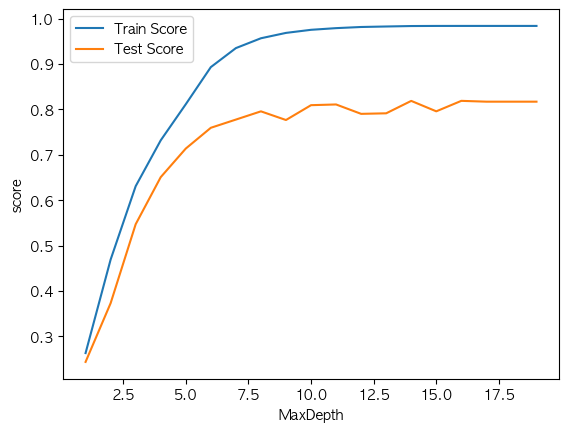

In [16]:
plt.plot(para_depth, train_score, linestyle="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('MaxDepth')
plt.legend()

## Max-Depth 14 선택

In [17]:
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 2, min_samples_split = 2,max_depth = v_max_depth)
tree_final.fit(df_train_x, df_train_y)
print('Train 모델 설명력 : {}'.format(tree_final.score(df_train_x, df_train_y).round(3)))
print('Test 모델 설명력 : {}'.format(tree_final.score(df_test_x, df_test_y).round(3)))

Train 모델 설명력 : 0.984
Test 모델 설명력 : 0.817


In [18]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

In [19]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
df_importance.round(3)

Feature  Importance
7                 age       0.347
0              cement       0.259
3               water       0.176
6      fine_aggregate       0.070
1  blast_furnace_slag       0.061
4    superplasticizer       0.046
5    coarse_aggregate       0.022
2             fly_ash       0.018

Text(0, 0.5, '변수')

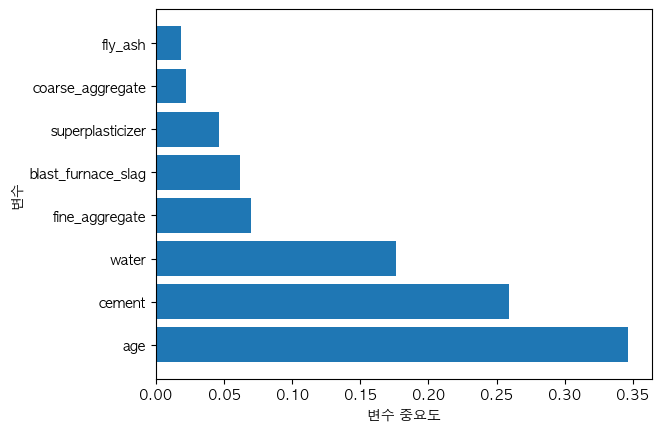

In [20]:
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 의사결정나무 
## leaf = 2
## split = 2
## depth = 14를 선택하여
## 
## 파라미터 설정 전
## Train 모델 설명력 : 1.000
## Test 모델 설명력 : 0.802
## 
## 파라미터 설정 후
## Train 모델 설명력 : 0.984
## Test 모델 설명력 : 0.817
## 
## 콘크리트에서 강도를 분류하는 가장 중요한 변수는 age, cement이다.

# 랜덤포레스트

In [21]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (694, 8)
train data Y size : (694,)
test data X size : (298, 8)
test data Y size : (298,)


# 랜덤포레스트 모델 생성 및 설명력 확인

In [22]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on trainging set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on trainging set : 0.986
Score on test set : 0.901


## 파라미터 조정
## estimators

In [23]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [24]:
df_score_n.round(3)

n_estimators  TrainScore  TestScore
0            10       0.978      0.894
1            20       0.983      0.903
2            30       0.984      0.899
3            40       0.985      0.901
4            50       0.985      0.904
5            60       0.985      0.902
6            70       0.986      0.902
7            80       0.986      0.901
8            90       0.986      0.901
9           100       0.986      0.901

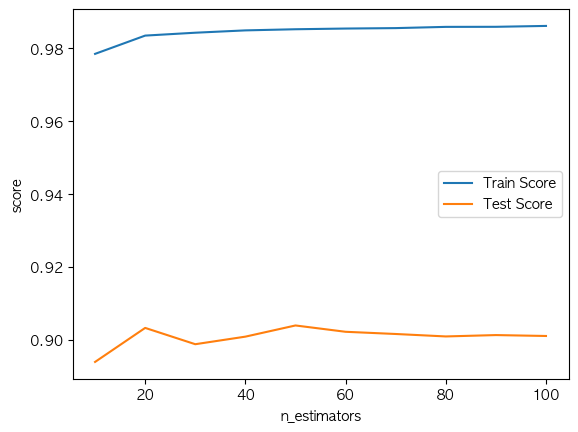

In [25]:
plt.plot(para_n_tree, train_score, linestyle="-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

## n_estimators 50 선택
## min_sample_leaf 조정

In [29]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples in para_leaf:
    rf = RandomForestRegressor(n_estimators = 50, min_samples_leaf = v_min_samples, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSample'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [30]:
df_score_leaf.round(3)

MinSample  TrainScore  TestScore
0           1       0.985      0.904
1           2       0.974      0.893
2           3       0.960      0.886
3           4       0.949      0.877
4           5       0.937      0.868
5           6       0.927      0.861
6           7       0.916      0.854
7           8       0.907      0.846
8           9       0.899      0.838
9          10       0.890      0.829
10         11       0.882      0.823
11         12       0.873      0.814
12         13       0.866      0.807
13         14       0.859      0.800
14         15       0.851      0.792
15         16       0.844      0.785
16         17       0.838      0.780
17         18       0.833      0.774
18         19       0.829      0.771

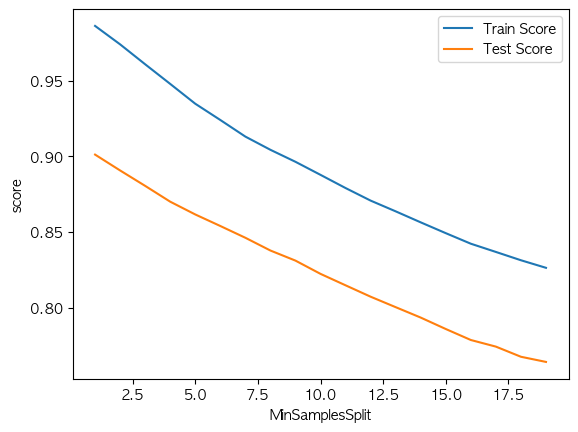

In [28]:
plt.plot(para_leaf, train_score, linestyle="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('MinSamplesSplit')
plt.legend()

## leaf 1선택
## split 조정

In [33]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(1,20)]
for v_min_split in para_split:
    rf = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 1, min_samples_split = v_min_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [35]:
df_score_split.round(3)

MinSplit  TrainScore  TestScore
0          2       0.985      0.904
1          4       0.980      0.899
2          6       0.973      0.894
3          8       0.966      0.889
4         10       0.956      0.883
5         12       0.948      0.877
6         14       0.941      0.871
7         16       0.933      0.863
8         18       0.927      0.858
9         20       0.920      0.851
10        22       0.913      0.845
11        24       0.907      0.839
12        26       0.901      0.834
13        28       0.893      0.826
14        30       0.886      0.819
15        32       0.878      0.813
16        34       0.872      0.806
17        36       0.868      0.804
18        38       0.862      0.799

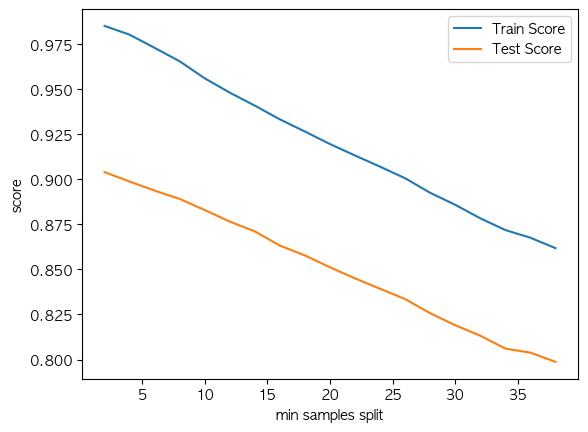

In [36]:
plt.plot(para_split, train_score, linestyle="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

## split 2선택
## depth 조정

In [38]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 20)]
for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 1, min_samples_split = 2, max_depth = v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [39]:
df_score_depth.round(3)

MaxDepth  TrainScore  TestScore
0          1       0.314      0.287
1          2       0.596      0.551
2          3       0.730      0.680
3          4       0.821      0.769
4          5       0.883      0.830
5          6       0.922      0.859
6          7       0.948      0.879
7          8       0.965      0.889
8          9       0.975      0.896
9         10       0.980      0.899
10        11       0.983      0.900
11        12       0.984      0.901
12        13       0.985      0.902
13        14       0.985      0.902
14        15       0.985      0.903
15        16       0.985      0.904
16        17       0.985      0.904
17        18       0.985      0.903
18        19       0.985      0.904

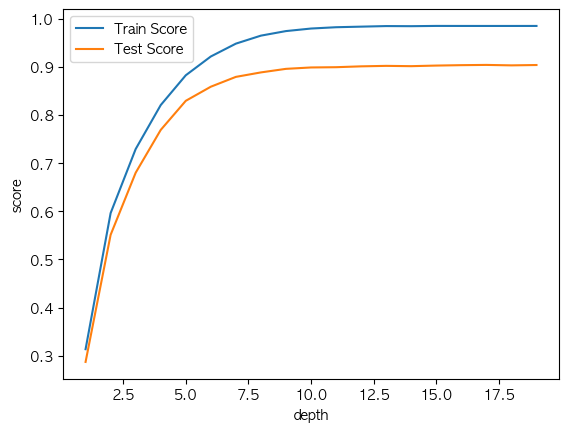

In [40]:
plt.plot(para_depth, train_score, linestyle="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('depth')
plt.legend()

## Max-Depth 16 선택

In [41]:
rf_final = RandomForestRegressor(random_state = 1234, n_estimators = 50, min_samples_leaf = 1, min_samples_split = 2, max_depth = 16)
rf_final.fit(df_train_x, df_train_y)
print("Score on trainig set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on trainig set: 0.985
Score on test set: 0.904


In [42]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

Feature  Importance
7                 age       0.352
0              cement       0.270
3               water       0.126
4    superplasticizer       0.085
1  blast_furnace_slag       0.064
6      fine_aggregate       0.052
5    coarse_aggregate       0.033
2             fly_ash       0.018

Text(0, 0.5, '변수')

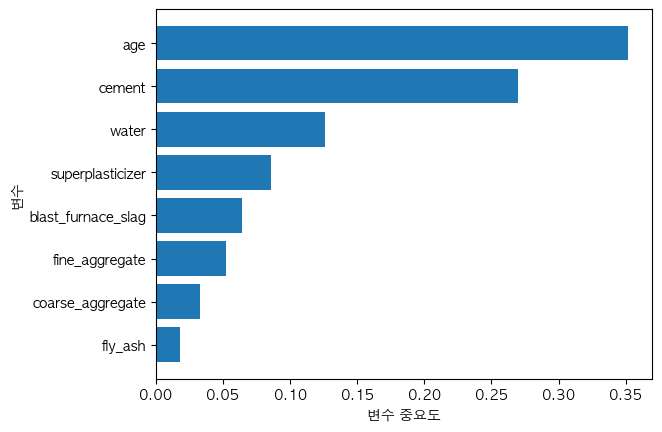

In [43]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel('변수 중요도')
plt.ylabel("변수")

## Random Foreset 
## 
## estimators = 50
## leaf = 1
## split = 2
## depth = 16를 선택하여
## 
## 파라미터 설정 전
## Train 모델 설명력 : 0.986
## Test 모델 설명력 : 0.901
## 
## 파라미터 설정 후
## Train 모델 설명력 : 0.985
## Test 모델 설명력 : 0.904
## 
## 콘크리트에서 강도를 분류하는 가장 중요한 변수는 age, cement이다.

# 그래디언트 부스팅

In [44]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (694, 8)
train data Y size : (694,)
test data X size : (298, 8)
test data Y size : (298,)


# 그래디언트 부스팅 모델 생성 및 설명력 확인

In [47]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on trainging set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on trainging set : 0.953
Score on test set : 0.901


## 파라미터 조정
## estimators

In [58]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(90,100)]
for v_n_estimators in para_n_tree:
    rf = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [60]:
df_score_n.round(3)

n_estimators  TrainScore  TestScore
0            500       0.989      0.926
1            510       0.989      0.926
2            520       0.989      0.926
3            530       0.989      0.926
4            540       0.990      0.926
5            550       0.990      0.926
6            560       0.990      0.926
7            570       0.990      0.927
8            580       0.991      0.927
9            590       0.991      0.927
10           600       0.991      0.927
11           610       0.991      0.927
12           620       0.991      0.927
13           630       0.991      0.928
14           640       0.992      0.928
15           650       0.992      0.928
16           660       0.992      0.928
17           670       0.992      0.928
18           680       0.992      0.928
19           690       0.992      0.928
20           700       0.992      0.929
21           710       0.992      0.929
22           720       0.992      0.929
23           730       0.993      0.929
24           740       0.993      0.929
25           750       0.993      0.929
26           760       0.993      0.929
27           770       0.993      0.929
28           780       0.993      0.929
29           790       0.993      0.929
30           800       0.993      0.929
31           810       0.993      0.929
32           820       0.993      0.929
33           830       0.993      0.929
34           840       0.994      0.929
35           850       0.994      0.929
36           860       0.994      0.929
37           870       0.994      0.930
38           880       0.994      0.930
39           890       0.994      0.930
40           900       0.994      0.929
41           910       0.994      0.929
42           920       0.994      0.929
43           930       0.994      0.929
44           940       0.994      0.929
45           950       0.994      0.929
46           960       0.995      0.930
47           970       0.995      0.930
48           980       0.995      0.929
49           990       0.995      0.929
50          1000       0.995      0.929

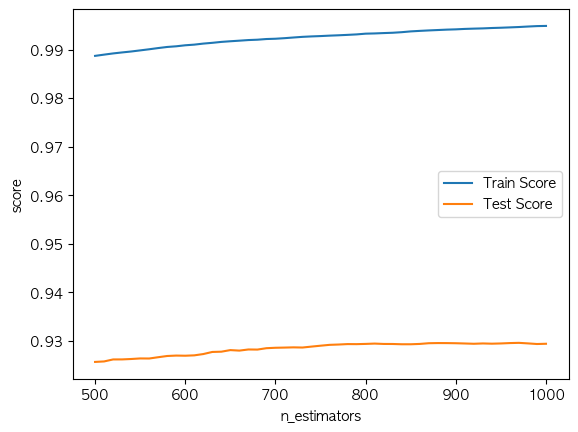

In [61]:
plt.plot(para_n_tree, train_score, linestyle="-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

## estimators 960 선택
## leaf 조정

In [62]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
for v_min_samples in para_leaf:
    rf = GradientBoostingRegressor(n_estimators = 960, min_samples_leaf = v_min_samples, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSample'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [63]:
df_score_leaf.round(3)

MinSample  TrainScore  TestScore
0           1       0.995      0.930
1           2       0.993      0.928
2           3       0.992      0.931
3           4       0.992      0.930
4           5       0.992      0.926
5           6       0.992      0.933
6           7       0.991      0.930
7           8       0.991      0.930
8           9       0.991      0.931
9          10       0.990      0.932
10         11       0.990      0.934
11         12       0.989      0.932
12         13       0.989      0.930
13         14       0.988      0.932
14         15       0.988      0.928
15         16       0.986      0.925
16         17       0.986      0.924
17         18       0.986      0.927
18         19       0.987      0.927
19         20       0.986      0.925

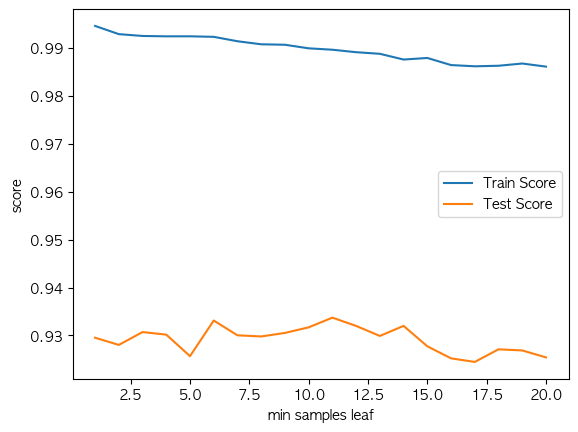

In [64]:
plt.plot(para_leaf, train_score, linestyle="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

## leaf 11선택
## split 조정

In [67]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(5,20)]
for v_min_split in para_split:
    rf = GradientBoostingRegressor(n_estimators = 960, min_samples_leaf = 11, min_samples_split = v_min_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [68]:
df_score_split.round(3)

MinSplit  TrainScore  TestScore
0         10       0.990      0.934
1         12       0.990      0.934
2         14       0.990      0.934
3         16       0.990      0.934
4         18       0.990      0.934
5         20       0.990      0.934
6         22       0.990      0.934
7         24       0.989      0.932
8         26       0.989      0.930
9         28       0.989      0.932
10        30       0.990      0.933
11        32       0.988      0.931
12        34       0.988      0.932
13        36       0.988      0.931
14        38       0.988      0.931

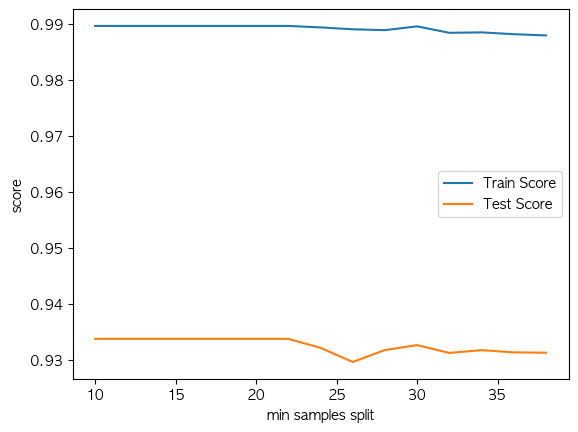

In [69]:
plt.plot(para_split, train_score, linestyle="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

## split 12 선택
## depth 조정

In [72]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 20)]
for v_max_depth in para_depth:
    rf = GradientBoostingRegressor(n_estimators = 960, min_samples_leaf = 11, min_samples_split = 12, max_depth = v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [73]:
df_score_depth.round(3)

MaxDepth  TrainScore  TestScore
0          1       0.917      0.892
1          2       0.974      0.924
2          3       0.990      0.934
3          4       0.995      0.930
4          5       0.997      0.935
5          6       0.998      0.935
6          7       0.999      0.932
7          8       0.999      0.930
8          9       0.999      0.932
9         10       0.999      0.932
10        11       0.999      0.934
11        12       0.999      0.931
12        13       0.999      0.933
13        14       0.999      0.932
14        15       0.999      0.932
15        16       0.999      0.932
16        17       0.999      0.933
17        18       0.999      0.932
18        19       0.999      0.933

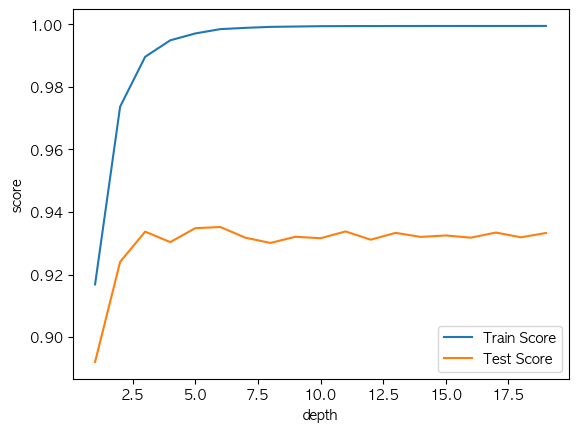

In [74]:
plt.plot(para_depth, train_score, linestyle="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle="-", label = "Test Score")
plt.ylabel('score')
plt.xlabel('depth')
plt.legend()

## depth 11 선택
## learning_rate 조정

In [78]:
train_score = []
test_score = []

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    rf = GradientBoostingRegressor(n_estimators = 960, min_samples_leaf = 11, min_samples_split = 12, max_depth = 11, learning_rate = v_learning_rate, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['learning late'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [79]:
df_score_lr.round(3)

learning late  TrainScore  TestScore
0            0.1       0.999      0.934
1            0.2       1.000      0.935
2            0.3       1.000      0.930
3            0.4       1.000      0.919
4            0.5       1.000      0.919
5            0.6       1.000      0.908
6            0.7       1.000      0.914
7            0.8       1.000      0.873
8            0.9       1.000      0.883

## learning_rate 0.2 선택

In [80]:
gb_final = GradientBoostingRegressor(n_estimators = 960, min_samples_leaf = 11, min_samples_split = 12, max_depth = 11, learning_rate = 0.2, random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=11, min_samples_leaf=11,
                          min_samples_split=12, n_estimators=960,
                          random_state=1234)

In [81]:
print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.935


In [82]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

Feature  Importance
7                 age       0.338
0              cement       0.311
3               water       0.112
1  blast_furnace_slag       0.094
4    superplasticizer       0.071
6      fine_aggregate       0.042
5    coarse_aggregate       0.023
2             fly_ash       0.008

Text(0, 0.5, '변수')

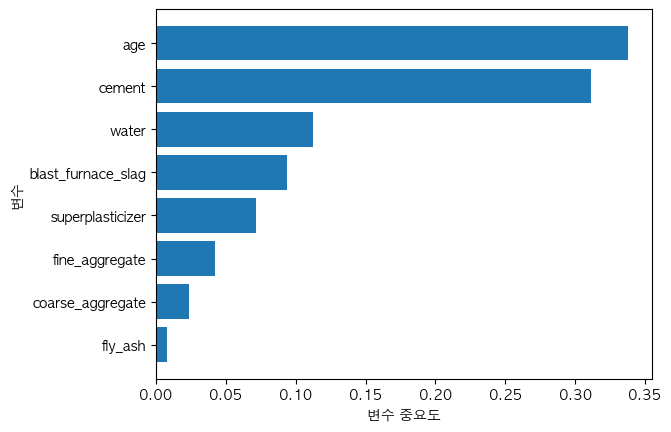

In [84]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel('변수 중요도')
plt.ylabel("변수")

## 그래디언트 부스팅
## 
## estimators = 960
## leaf = 11
## split = 12
## depth = 11
## learning_rate = 0.2 선택하여
## 
## 파라미터 설정 전
## Train 모델 설명력 : 0.953
## Test 모델 설명력 : 0.901
## 
## 파라미터 설정 후
## Train 모델 설명력 : 1
## Test 모델 설명력 : 0.935
## 
## 콘크리트에서 강도를 분류하는 가장 중요한 변수는 age, cement이다.

## 의사결정나무 최종 모델
## Train 모델 설명력 : 0.984
## Test 모델 설명력 : 0.817
## 
## 랜덤포레스트 최종 모델
## Train 모델 설명력 : 0.985
## Test 모델 설명력 : 0.904
## 
## 그레디언트 부스팅 최종 모델
## Train 모델 설명력 : 1
## Test 모델 설명력 : 0.935

## 그레이언트 부스팅을 사용한 모델이 적합하다.
## 세개의 알고리즘에서 공통적으로 중요한 변수는 age, cement이다.